# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

# 0. Read data, visualize, basic statistics, understand it

* Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


* Dataset loading

In [2]:
path = 'dataset_bank.csv'
dataset = pd.read_csv(path)
pd.set_option('display.max_columns', None)

## 2. Feature Anaysis, Extraction & Selection


### 2.1 Check for missing values

In [3]:
for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

### 2.2 Check for unkown values

In [4]:

for column in dataset.columns:
    if any(dataset[column].isin(['Unknown'])):
        print(f'{column} has the value "Unknown"')

Education_Level has the value "Unknown"
Marital_Status has the value "Unknown"
Income_Category has the value "Unknown"


### 2.3 Take a look at the firt 10 rows

In [5]:
dataset.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36.0,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46.0,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27.0,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36.0,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36.0,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### 2.4 Handling unusual values

* Listing unique values

* Months on book has negative values and unussualy high values for the max. Te histogram and the boxplots show that somthing is not right with these values. This column is to be explored further

In [6]:
dataset['Months_on_book'].unique().tolist()   #javuva -2 i 3.21+11

[39.0,
 44.0,
 36.0,
 34.0,
 21.0,
 46.0,
 27.0,
 31.0,
 54.0,
 30.0,
 48.0,
 37.0,
 56.0,
 42.0,
 49.0,
 33.0,
 28.0,
 38.0,
 41.0,
 43.0,
 45.0,
 52.0,
 40.0,
 50.0,
 35.0,
 47.0,
 32.0,
 20.0,
 29.0,
 25.0,
 53.0,
 24.0,
 55.0,
 23.0,
 22.0,
 26.0,
 2147483647.0,
 13.0,
 51.0,
 19.0,
 15.0,
 17.0,
 18.0,
 -2147483647.0,
 16.0,
 14.0,
 321000000000.0]

In [7]:
dataset = dataset[dataset['Months_on_book'] >0]

In [8]:
dataset = dataset[dataset['Months_on_book'] <500]

In [9]:
dataset = dataset.drop(['CLIENTNUM'], axis = 1)

### 2.5 Prepare the dataset for analysis

* Encoding the categoral data using LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder     

labelencoder = LabelEncoder()
# Categorical encoding
dataset['Attrition_Flag'] = labelencoder.fit_transform(dataset['Attrition_Flag'])
dataset['Gender'] = labelencoder.fit_transform(dataset['Gender'])
dataset['Education_Level'] = labelencoder.fit_transform(dataset['Education_Level'])
dataset['Card_Category'] = labelencoder.fit_transform(dataset['Card_Category'])
dataset['Marital_Status'] = labelencoder.fit_transform(dataset['Marital_Status'])
dataset.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,$60K - $80K,0,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,Less than $40K,0,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,$80K - $120K,0,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,Less than $40K,0,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,$60K - $80K,0,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,1,2,2,1,$40K - $60K,0,36.0,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,1,51,1,4,6,1,$120K +,1,46.0,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,1,32,1,0,3,3,$60K - $80K,3,27.0,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,1,37,1,3,5,2,$60K - $80K,0,36.0,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,1,48,1,2,2,2,$80K - $120K,0,36.0,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


* Applying one hot encoding to Income_Category column

In [11]:
##One hot encoding
dataset_dummies = pd.get_dummies(dataset[['Income_Category']])
dataset = pd.concat([dataset, dataset_dummies], axis='columns')
dataset = dataset.drop(['Income_Category'], axis = 1)

dataset.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,1,45,1,3,3,1,0,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,1,0,0,0
1,1,49,0,5,2,2,0,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,0,1,0
2,1,51,1,3,2,1,0,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,1,0,0
3,1,40,0,4,3,3,0,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,0,1,0
4,1,40,1,3,5,1,0,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,1,0,0,0
5,1,44,1,2,2,1,0,36.0,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,1,0,0,0,0
6,1,51,1,4,6,1,1,46.0,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1,0,0,0,0,0
7,1,32,1,0,3,3,3,27.0,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0,0,1,0,0,0
8,1,37,1,3,5,2,0,36.0,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0,0,1,0,0,0
9,1,48,1,2,2,2,0,36.0,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0,0,0,1,0,0


* Scaling theTotal_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 columns using rocust scaler

In [12]:

from sklearn.preprocessing import RobustScaler
columns = ['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']
transformer = RobustScaler()
dataset[columns] = transformer.fit_transform(dataset[columns])

dataset.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,1,45,1,3,3,1,0,39.0,5,1,3,12691.0,777,11914.0,2.627193,1144,42,3.902954,0.061,0,0,1,0,0,0
1,1,49,0,5,2,2,0,44.0,6,1,2,8256.0,864,7392.0,3.530702,1291,33,12.717300,0.105,0,0,0,0,1,0
2,1,51,1,3,2,1,0,36.0,4,1,0,3418.0,0,3418.0,8.149123,1887,20,6.890295,0.000,0,0,0,1,0,0
3,1,40,0,4,3,3,0,34.0,3,4,1,3313.0,2517,796.0,2.934211,1171,20,6.890295,0.760,0,0,0,0,1,0
4,1,40,1,3,5,1,0,21.0,5,1,0,4716.0,0,4716.0,6.311404,816,28,7.594937,0.000,0,0,1,0,0,0
5,1,44,1,2,2,1,0,36.0,3,1,2,4010.0,1247,2763.0,2.807018,1088,24,0.616034,0.311,0,1,0,0,0,0
6,1,51,1,4,6,1,1,46.0,6,1,3,34516.0,2264,32252.0,5.434211,1330,31,0.092827,0.066,1,0,0,0,0,0
7,1,32,1,0,3,3,3,27.0,2,2,2,29081.0,1396,27685.0,6.438596,1538,36,0.059072,0.048,0,0,1,0,0,0
8,1,37,1,3,5,2,0,36.0,5,2,0,22352.0,2517,19835.0,11.486842,1350,24,2.033755,0.113,0,0,1,0,0,0
9,1,48,1,2,2,2,0,36.0,6,3,3,11656.0,1677,9979.0,3.456140,1441,32,0.767932,0.144,0,0,0,1,0,0


* Spliting the data into train and test sets 

In [13]:
X = dataset.drop("Attrition_Flag", axis=1)
y = dataset['Attrition_Flag']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

## 3. Classification models
* Fitting, traning and testing various models to see which one performs best

* Importing relevant libraries

In [15]:
# Import library
import numpy as np
import pandas as pd

# For performing train/test/split
from sklearn.model_selection import train_test_split

# import all the models
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# For computing accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

# This is for finding the model parameters part
from sklearn.model_selection import GridSearchCV # import Grid Search cross validation

###  3.1 Dummy classifier

In [16]:
#Fit a dummy classifier.
clf = DummyClassifier(strategy='stratified', random_state=0)
clf.fit(X_train, y_train)

#make predictions for the dataset
y_predict_clf = clf.predict(X_test)


In [17]:
#Evaluate the predictions 

clf_accuracy = clf.score(X_test, y_test)
precision_clf = precision_score(y_test, y_predict_clf)
recall_clf = recall_score(y_test, y_predict_clf)
F1_clf = f1_score(y_test, y_predict_clf)
Fbeta_clf = fbeta_score(y_test, y_predict_clf, 0.1)
cm1 = confusion_matrix(y_test, y_predict_clf)

### 3.2 Naive bayes

In [18]:
# Fit a Naive bayes model

modelg = GaussianNB()
modelg.fit(X, y);
modelg.score(X_test, y_test)

# Make predictions for tne dataset
y_predict_GNB = modelg.predict(X_test)

In [19]:
#Evaluate the model
GaussainNB_accuracy = modelg.score(X_test, y_test)
precision_GNB = precision_score(y_test, y_predict_GNB)
recall_GNB = recall_score(y_test, y_predict_GNB)
F1_GNB = f1_score(y_test, y_predict_GNB)
Fbeta_GNB = fbeta_score(y_test, y_predict_GNB, 0.1)
cm2 = confusion_matrix(y_test, y_predict_GNB)


### 3.3 Decision Tree Classifier

In [20]:
# Fit a Decision Tree Classifier
tree_model = tree.DecisionTreeClassifier(max_depth = 4) #15

#Tuning algoritam parameters
param_grid = {'max_leaf_nodes': np.arange(1, 30)}
tree_model_gscv=GridSearchCV(tree_model,param_grid,cv=8) #4
tree_model_gscv.fit(X_train, y_train)
print(tree_model_gscv.best_params_)
print(tree_model_gscv.best_score_)

# Make predictions for the test data
y_predict_DT = tree_model_gscv.predict(X_test)

{'max_leaf_nodes': 12}
0.9251865168030139


In [21]:
# Evaluate the predictions

DT_accuracy = tree_model_gscv.score(X_test, y_test)
precision_DT = precision_score(y_test, y_predict_DT)
recall_DT = recall_score(y_test, y_predict_DT)
F1_DT = f1_score(y_test, y_predict_DT)
Fbeta_DT = fbeta_score(y_test, y_predict_DT, 0.1)
cm3 = confusion_matrix(y_test, y_predict_DT)

### 3.3.1 Grid search Decision Tree Classifier

In [22]:
#Tuning algoritam parameters
tree_model = tree.DecisionTreeClassifier(max_depth = 4) #15
param_grid = {'max_leaf_nodes': np.arange(1, 30)}
tree_model_gscv=GridSearchCV(tree_model,param_grid,cv=8) #4
tree_model_gscv.fit(X_train, y_train)
print(tree_model_gscv.best_params_)
y_predict_DT = tree_model_gscv.predict(X_test)

{'max_leaf_nodes': 12}


In [23]:
tree_model_re = tree.DecisionTreeClassifier(max_depth = 12) #12
tree_model_re.fit(X_train, y_train)
y_predict_re = tree_model_re.predict(X_test)

In [24]:
# Evaluate the predictions
Tree_re_accuracy = accuracy_score(y_test, y_predict_re)
precision_Tree_re = precision_score(y_test, y_predict_re)
recall_Tree_re = recall_score(y_test, y_predict_re)
F1_Tree_re = f1_score(y_test, y_predict_re)
Fbeta_Tree_re = fbeta_score(y_test, y_predict_re, 0.1)
cm3a = confusion_matrix(y_test, y_predict_re)

# 3.4 KNeighborsClassifier

In [25]:
# Fit the NKK model
knn1 = KNeighborsClassifier(n_neighbors=10, p=1)
knn1.fit(X_train, y_train)

# Make predictions for the test data
y_predict_KNN1 = knn1.predict(X_test)

In [26]:
# Evaluate the predictions

KNN_accuracy = knn1.score(X_test, y_test)
precision_KNN = precision_score(y_test, y_predict_KNN1)
recall_KNN = recall_score(y_test, y_predict_KNN1)
F1_KNN = f1_score(y_test, y_predict_KNN1)
Fbeta_KNN = fbeta_score(y_test, y_predict_KNN1, 0.1)
cm5 = confusion_matrix(y_test, y_predict_KNN1)

In [27]:
# Tuning algoritam parameters
from sklearn.model_selection import GridSearchCV # import Grid Search cross validation
knn2 = KNeighborsClassifier() # create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50), 'p': np.arange(1,3)} #use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=4)#fit model to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)

{'n_neighbors': 25, 'p': 2}


In [28]:
# Refit a model
knn2 = KNeighborsClassifier(n_neighbors=25, p=2) ##  <------Imported best KNN parametars
knn2.fit(X_train, y_train)
y_predict_KNN2 = knn2.predict(X_test)

# Evaluate the predictions
KNN2_accuracy = knn2.score(X_test, y_test)
precision_KNN2 = precision_score(y_test, y_predict_KNN2)
recall_KNN2 = recall_score(y_test, y_predict_KNN2)
F1_KNN2 = f1_score(y_test, y_predict_KNN2)
Fbeta_KNN2 = fbeta_score(y_test, y_predict_KNN2, 0.1)
cm6 = confusion_matrix(y_test, y_predict_KNN2)

### 3.5 XGBoost

In [29]:
# First XGBoost model 

# fit model no training data
modelxg = XGBClassifier()
modelxg.fit(X_train, y_train)

# make predictions for test data
y_predict_XGB = modelxg.predict(X_test)
predictions = [round(value) for value in y_predict_XGB]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

[19:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
XGB_accuracy = modelxg.score(X_test, y_test)
precision_XGB = precision_score(y_test, y_predict_XGB)
recall_XGB = recall_score(y_test, y_predict_XGB)
F1_XGB = f1_score(y_test, y_predict_XGB)
Fbeta_XGB = fbeta_score(y_test, y_predict_XGB, 0.1)
cm7 = confusion_matrix(y_test, y_predict_XGB)

### 3.5.1 Random search XGBOOST
* Tuning algoritam parameters

In [31]:
# make the grid of the parameters
grid_search = {'criterion': ['mse', 'mae'],
               'max_depth': list(np.linspace(1, 30, 3, dtype = int)) + [None],
               'max_features': [5, 10, 11, None],
               'min_samples_leaf': [1, 5, 10],
               'min_samples_split': [2, 5],
               'n_estimators': [100],
               'random_state': [1]}

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
np.random.seed(seed=1)
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)
#10-fold Cross validaiton - ALL Model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

#Create the space of hyperparameter values

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 10, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
modelxg_f = XGBClassifier()

#create the  RandomSearch model and train it
model = RandomizedSearchCV(estimator = modelxg_f, 
                           param_distributions = grid_search, 
                           n_iter = 10, 
                           cv = kf, verbose= 5, random_state= 1, 
                           n_jobs = -1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   25.1s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.8s finished


[19:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree

In [32]:
print("Best model: ", model.best_estimator_)
print("Best Parameters: ", model.best_params_)
print("Best score ", model.best_score_)
print("Best score ", pd.DataFrame.from_dict(model.cv_results_))

Best model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='mae', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              max_features=11, min_child_weight=1, min_samples_leaf=5,
              min_samples_split=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best Parameters:  {'random_state': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 11, 'max_depth': None, 'criterion': 'mae'}
Best score  0.9671210944323176
Best score     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.901670      0.014217         0.

In [33]:
# Testing with best parametars
modelxg_re = XGBClassifier(   
                        n_estimators=908, 
                        min_samples_split=10, 
                        min_samples_leaf=1, 
                        max_features="auto", 
                        max_depth=10, 
                        bootstrap=True)


modelxg_re.fit(X_train, y_train)
# make predictions for test data
y_predict_XGB_re = modelxg_re.predict(X_test)
predictions_re = [round(value) for value in y_predict_XGB]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions_re)

[19:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
XGB_re_accuracy = accuracy_score(y_test, predictions_re)
precision_XGB_re = precision_score(y_test, predictions_re)
recall_XGB_re = recall_score(y_test, predictions_re)
F1_XGB_re = f1_score(y_test, predictions_re)
Fbeta_XGB_re = fbeta_score(y_test, predictions_re, 0.1)
cm3a = confusion_matrix(y_test, predictions_re)

### 3.6 Logistic regression

In [35]:
# Fit the Logistic regression classifier

scaler = StandardScaler()
lr = LogisticRegression()
model_LR = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model_LR.fit(X_train, y_train)

# Make predictions for the test data
y_predict_LR = model_LR.predict(X_test)
y_predict_LR_probs = model_LR.predict_proba(X_test)[:,1]

train_auc_roc = roc_auc_score(y_test, y_predict_LR_probs)*100

In [36]:
#Evaluate the predictions

LR_accuracy = modelxg.score(X_test, y_test)
precision_LR = precision_score(y_test, y_predict_LR)
recall_LR = recall_score(y_test, y_predict_LR)
F1_LR = f1_score(y_test, y_predict_LR)
Fbeta_LR = fbeta_score(y_test, y_predict_LR, 0.1)
cm8 = confusion_matrix(y_test, y_predict_LR)

### 3.7 Random Forest Classifier

In [37]:
# Fit the random forest classifier
RF_model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0).fit(X_train, y_train)
# Make prediction for the test data
y_predict_RF = RF_model.predict(X_test)

In [38]:
#Evaluate the predictions
RF_accuracy = RF_model.score(X_test, y_test)
precision_RF = precision_score(y_test, y_predict_RF)
recall_RF = recall_score(y_test, y_predict_RF)
F1_RF = f1_score(y_test, y_predict_RF)
Fbeta_RF = fbeta_score(y_test, y_predict_RF, 0.1)
cm9 = confusion_matrix(y_test, y_predict_RF)

### 3.7.1 Random search


In [39]:
# Tuning the algoritams

list(np.linspace(10, 1200, 3, dtype = int)) + [None]
np.random.seed(seed=1)
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)
#10-fold Cross validaiton - ALL Model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']


#Create the space of hyperparameter values

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 10, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

from sklearn.model_selection import RandomizedSearchCV

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


tree_f = RandomForestClassifier()

#create the  RandomSearch model and train it
model = RandomizedSearchCV(estimator = tree_f, 
                           param_distributions = random_search, 
                           n_iter = 10, 
                           cv = kf, verbose= 5, random_state= 1, 
                           n_jobs = -1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  1.4min remaining:   30.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 10, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 118, 136, 155,
                                                         173, 191, 210, 228,
                                                         246, 265, 283, 302,
                                                         320, 338, 357, 375,
                                               

In [40]:
print("Best model: ", model.best_estimator_)
print("Best Parameters: ", model.best_params_)
print("Best score ", model.best_score_)
print("Best score ", pd.DataFrame.from_dict(model.cv_results_))

Best model:  RandomForestClassifier(bootstrap=False, max_depth=110, n_estimators=706)
Best Parameters:  {'n_estimators': 706, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}
Best score  0.9571957513460977
Best score     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      32.661574      0.723701         1.269485        0.096057   
1      21.391696      1.027942         1.089067        0.021110   
2      15.886402      0.355022         0.848387        0.052276   
3      28.444076      0.758101         1.651401        0.187783   
4      34.027973      0.893274         1.667426        0.055587   
5       5.978293      0.117693         0.342787        0.054714   
6      11.719473      0.353865         0.728574        0.069592   
7      31.397144      0.528155         1.199109        0.081788   
8      38.151297      0.903745         1.140494        0.021658   
9      25.848164      3.304754         1.041457     

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Refitting the model
RF_model_re = RandomForestClassifier(
                                n_estimators=706, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                max_features='auto', 
                                max_depth=110, 
                                bootstrap=False,
                                random_state=0).fit(X_train, y_train)

# make predictions for the test data
y_predict_RF = RF_model_re.predict(X_test)

In [42]:
#Evaluate the model

RF_re_accuracy = accuracy_score(y_test, y_predict_RF)
precision_RF_re = precision_score(y_test, y_predict_RF)
recall_RF_re = recall_score(y_test, y_predict_RF)
F1_RF_re = f1_score(y_test, y_predict_RF)
Fbeta_RF_re = fbeta_score(y_test, y_predict_RF, 0.1)
cm9a = confusion_matrix(y_test, y_predict_RF)

## 4. Evaluation and comparisons, various metrics

In [43]:
data_ = {'Classifier':  ['Dummy classifier', 'GaussianNB','Decision Tree','Decision Tree-Refit','KNN','KNN-Refit', 'XGBoost','XGBoost-Refit',
                         'Logistic Regression','Random Forest','Random Forest-Refit'],
        'Model Accuracy': [clf_accuracy, GaussainNB_accuracy, DT_accuracy,Tree_re_accuracy, KNN_accuracy, KNN2_accuracy, 
                           XGB_accuracy,XGB_re_accuracy,LR_accuracy, RF_accuracy,RF_re_accuracy] ,
        'Percision': [precision_clf,precision_GNB, precision_DT,precision_Tree_re, precision_KNN, precision_KNN2,precision_XGB,precision_XGB_re,
                     precision_LR, precision_RF,precision_RF_re] ,
        'Recall': [recall_clf, recall_GNB, recall_DT,recall_Tree_re, recall_KNN, recall_KNN2, recall_XGB,recall_XGB_re, recall_LR, recall_RF,recall_RF_re] ,
        'F1 Score': [F1_clf,F1_GNB, F1_DT, F1_Tree_re,F1_KNN, F1_KNN2, F1_XGB,F1_XGB_re, F1_LR, F1_RF,F1_RF_re] ,
        'Fbeta_score': [Fbeta_clf, Fbeta_GNB, Fbeta_DT,Fbeta_Tree_re, Fbeta_KNN, Fbeta_KNN2, Fbeta_XGB,Fbeta_XGB_re, Fbeta_LR, Fbeta_RF,Fbeta_RF_re ]
                }
comparison = pd.DataFrame (data_, columns = ['Classifier','Model Accuracy','Percision','Recall','F1 Score', 'Fbeta_score'])
comparison

,Classifier,Model Accuracy,Percision,Recall,F1 Score,Fbeta_score
0,Dummy classifier,0.717618,0.838049,0.822695,0.830301,0.837895
1,GaussianNB,0.894293,0.937315,0.936761,0.937038,0.937310
2,Decision Tree,0.913151,0.926363,0.973995,0.949582,0.926812
3,Decision Tree-Refit,0.941935,0.960257,0.971040,0.965619,0.960363
4,KNN,0.895782,0.927336,0.950355,0.938704,0.927558
5,KNN-Refit,0.887841,0.909497,0.962175,0.935095,0.909990
6,XGBoost,0.976179,0.981829,0.989953,0.985874,0.981909
7,XGBoost-Refit,0.976179,0.981829,0.989953,0.985874,0.981909
8,Logistic Regression,0.976179,0.920697,0.967494,0.943516,0.921139
9,Random Forest,0.882878,0.881952,0.993499,0.934408,0.882933


* Comparing the models

In [44]:
lista_models = []

clf.fit(X_train, y_train)
lista_models.append(clf)

modelg.fit(X_train, y_train)
lista_models.append(modelg)

tree_model_gscv.fit(X_train, y_train)
lista_models.append(tree_model_gscv)

knn1.fit(X_train, y_train)
lista_models.append(knn1)

knn2.fit(X_train, y_train)
lista_models.append(knn2)

modelxg.fit(X_train, y_train)
lista_models.append(modelxg)

model_LR.fit(X_train, y_train)
lista_models.append(model_LR)

RF_model.fit(X_train, y_train)
lista_models.append(RF_model)

modelxg_re.fit(X_train, y_train)
lista_models.append(modelxg_re)

RF_model_re.fit(X_train, y_train)
lista_models.append(RF_model_re)




[19:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expl

* Ploting a roc curves for all the models for comparison

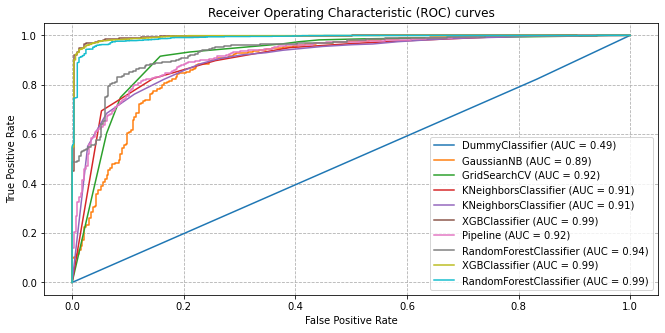

In [45]:
fig, ax_roc = plt.subplots(1, 1, figsize=(11, 5))
for model in lista_models:
    plot_roc_curve(model, X_test, y_test, ax=ax_roc)
    
ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')

ax_roc.grid(linestyle='--')

plt.legend()
plt.show()

* Plotting confusion matrixes for all the models for comparison

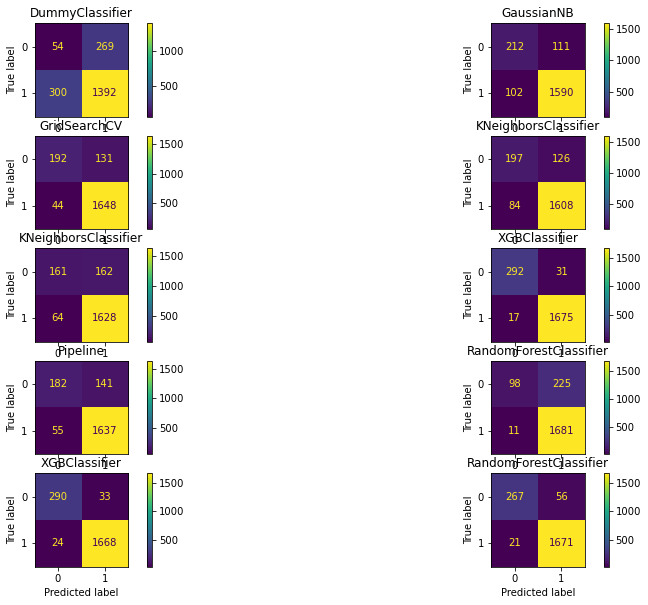

In [46]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure (figsize=(15,10)) 
redici = 5
koloni = 2
for i in range (0, redici*koloni):
    kelija = fig.add_subplot(redici, koloni, i+1)
    plot_confusion_matrix(lista_models[i], X_test, y_test, ax=kelija)
    plt.title(type(lista_models[i]).__name__)
plt.show()

In [47]:
# Export best model
import pickle
save_as_dir = 'modelxg_re.bin'
pickle.dump(modelxg_re, open(save_as_dir, 'wb'))